In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from linearmodels import PanelOLS
import plotly.express as px

sns.set_theme()

In [81]:
path = 'Datasets/' # To be changed if needed

In [82]:
df2 = pd.read_csv(path + 'WB_WDI_SL_TLF_CACT_FE_ZS.csv')
df3 = pd.read_csv(path + 'WB_WDI_SL_TLF_CACT_MA_ZS.csv')
df6 = pd.read_csv(path + 'WB_WDI_SL_TLF_CACT_FM_ZS.csv')

In [83]:
Male = df3.copy()
Female = df2.copy()
Ratio = df6.copy()

* MALE: https://data360.worldbank.org/en/indicator/WB_WDI_SL_TLF_CACT_MA_ZS 
* FEMALE: https://data360.worldbank.org/en/indicator/WB_WDI_SL_TLF_CACT_FE_ZS
* RATIO: https://data360.worldbank.org/en/indicator/WB_WDI_SL_TLF_CACT_FM_ZS

In [84]:
Male = Male[['REF_AREA_ID','REF_AREA_NAME','TIME_PERIOD','OBS_VALUE','SEX_ID']]
Female = Female[['REF_AREA_ID','REF_AREA_NAME','TIME_PERIOD','OBS_VALUE','SEX_ID']]

In [85]:
Female[(Female['REF_AREA_NAME']=='Middle East and North Africa') & (Female['TIME_PERIOD']==2023)]

,REF_AREA_ID,REF_AREA_NAME,TIME_PERIOD,OBS_VALUE,SEX_ID
7784,MEA,Middle East and North Africa,2023,18.108904,F


In [86]:
Male[(Male['REF_AREA_NAME']=='Sweden') & (Male['TIME_PERIOD']==2023)]

,REF_AREA_ID,REF_AREA_NAME,TIME_PERIOD,OBS_VALUE,SEX_ID
7960,SWE,Sweden,2023,68.273,M


In [87]:
df = pd.merge(Male,Female, on=['REF_AREA_ID','REF_AREA_NAME','TIME_PERIOD'], how='outer')
df = df.rename(columns={'OBS_VALUE_x': 'VALUE_MALE', 'OBS_VALUE_y': 'VALUE_FEMALE'})
df.drop(columns=['SEX_ID_x', 'SEX_ID_y'], inplace=True)

Zone ripartitions as: https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups

In [88]:
countries = [
    'Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia',
    'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados',
    'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
    'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
    'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
    'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
    'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",'Croatia', 'Cuba', 'Cyprus',
    'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.',
    'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
    'Fiji', 'Finland', 'France', 'French Polynesia', 'Gabon', 'Gambia, The', 'Georgia', 'Germany', 'Ghana',
    'Greece','Guam', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong SAR, China',
    'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran, Islamic Rep.', 'Iraq', 'Ireland',
    'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya',
    "Korea, Dem. People's Rep.", 'Korea, Rep.', 'Kuwait', 'Kyrgyz Republic', 'Lao PDR',
    'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Lithuania', 'Luxembourg', 'Macao SAR, China',
    'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Mauritania',
    'Mauritius', 'Mexico', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique',
    'Myanmar', 'Namibia', 'Nepal', 'Netherlands', 'New Caledonia', 'New Zealand', 'Nicaragua', 'Niger',
    'Nigeria', 'North Macedonia', 'Norway', 'Oman', 'Pakistan', 'Panama',
    'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal',
    'Puerto Rico', 'Qatar', 'Romania', 'Russian Federation', 'Rwanda', 'Samoa',
    'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles',
    'Sierra Leone', 'Singapore', 'Slovak Republic', 'Slovenia', 'Solomon Islands',
    'Somalia', 'South Africa', 'South Sudan', 'Spain', 'Sri Lanka', 'St. Lucia',
    'St. Vincent and the Grenadines', 'Sudan', 'Suriname', 'Sweden', 'Switzerland',
    'Syrian Arab Republic', 'Taiwan, China', 'Tajikistan', 'Tanzania', 'Thailand',
    'Timor-Leste', 'Togo', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkiye',
    'Turkmenistan', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom',
    'United States', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela, RB', 'Viet Nam', 'Virgin Islands (U.S.)', 'West Bank and Gaza',
    'Yemen, Rep.', 'Zambia', 'Zimbabwe'
]

east_asia_pacific = [
    'American Samoa', 'Australia', 'Brunei Darussalam', 'Cambodia', 'China',
    'Fiji', 'French Polynesia', 'Guam', 'Hong Kong SAR, China', 'Indonesia',
    'Japan', 'Kiribati', "Korea, Dem. People's Rep.", 'Korea, Rep.', 'Lao PDR',
    'Macao SAR, China', 'Malaysia', 'Marshall Islands', 'Micronesia, Fed. Sts.',
    'Mongolia', 'Myanmar', 'Nauru', 'New Caledonia', 'New Zealand',
    'Northern Mariana Islands', 'Palau', 'Papua New Guinea', 'Philippines',
    'Samoa', 'Singapore', 'Solomon Islands', 'Taiwan, China', 'Thailand',
    'Timor-Leste', 'Tonga', 'Tuvalu', 'Vanuatu', 'Viet Nam'
]
europe_central_asia = [
    'Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium',
    'Bosnia and Herzegovina', 'Bulgaria', 'Channel Islands', 'Croatia', 'Cyprus',
    'Czechia', 'Denmark', 'Estonia', 'Faroe Islands', 'Finland', 'France', 'Georgia',
    'Germany', 'Gibraltar', 'Greece', 'Greenland', 'Hungary', 'Iceland', 'Ireland',
    'Isle of Man', 'Italy', 'Kazakhstan', 'Kosovo', 'Kyrgyz Republic', 'Latvia',
    'Liechtenstein', 'Lithuania', 'Luxembourg', 'Moldova', 'Monaco', 'Montenegro',
    'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania',
    'Russian Federation', 'San Marino', 'Serbia', 'Slovak Republic', 'Slovenia',
    'Spain', 'Sweden', 'Switzerland', 'Tajikistan', 'Turkiye', 'Turkmenistan',
    'Ukraine', 'United Kingdom', 'Uzbekistan'
]
latin_america_caribbean = [
    'Antigua and Barbuda', 'Argentina', 'Aruba', 'Bahamas, The', 'Barbados', 'Belize',
    'Bolivia', 'Brazil', 'British Virgin Islands', 'Cayman Islands', 'Chile',
    'Colombia', 'Costa Rica', 'Cuba', 'Curacao', 'Dominica', 'Dominican Republic',
    'Ecuador', 'El Salvador', 'Grenada', 'Guatemala', 'Guyana', 'Haiti', 'Honduras',
    'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Puerto Rico',
    'Sint Maarten (Dutch part)', 'St. Kitts and Nevis', 'St. Lucia',
    'St. Martin (French part)', 'St. Vincent and the Grenadines', 'Suriname',
    'Trinidad and Tobago', 'Turks and Caicos Islands', 'Uruguay', 'Venezuela, RB',
    'Virgin Islands (U.S.)'
]
middle_east_north_africa = [
    'Algeria', 'Bahrain', 'Djibouti', 'Egypt, Arab Rep.', 'Iran, Islamic Rep.',
    'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Libya', 'Malta',
    'Morocco', 'Oman', 'Qatar', 'Saudi Arabia', 'Syrian Arab Republic', 'Tunisia',
    'United Arab Emirates', 'West Bank and Gaza', 'Yemen, Rep.'
]
north_america = [
    'Bermuda', 'Canada', 'United States'
]
south_asia = [
    'Afghanistan', 'Bangladesh', 'Bhutan', 'India',
    'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka'
]
sub_saharan_africa = [
    'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
    'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad',
    'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
    'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon',
    'Gambia, The', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya',
    'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
    'Mauritius', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda',
    'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone',
    'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania',
    'Togo', 'Uganda', 'Zambia', 'Zimbabwe'
]

In [89]:
# Definisci una funzione per mappare i paesi alle regioni
def assign_region(country):
    if country in east_asia_pacific:
        return 'East Asia & Pacific'
    elif country in europe_central_asia:
        return 'Europe & Central Asia'
    elif country in latin_america_caribbean:
        return 'Latin America & Caribbean'
    elif country in middle_east_north_africa:
        return 'Middle East & North Africa'
    elif country in north_america:
        return 'North America'
    elif country in south_asia:
        return 'South Asia'
    elif country in sub_saharan_africa:
        return 'Sub-Saharan Africa'
    else:
        return 'Other'

In [90]:
df_countries = df[df['REF_AREA_NAME'].isin(countries)].copy()

# Applica la funzione per creare la colonna REGION
df_countries.loc[:, 'REGION'] = df_countries.loc[:,'REF_AREA_NAME'].apply(assign_region)

df_filtered = df_countries.dropna(subset=['VALUE_MALE', 'VALUE_FEMALE', 'REGION'])
centroids = df_filtered.groupby('REGION')[['VALUE_MALE', 'VALUE_FEMALE']].mean().reset_index()

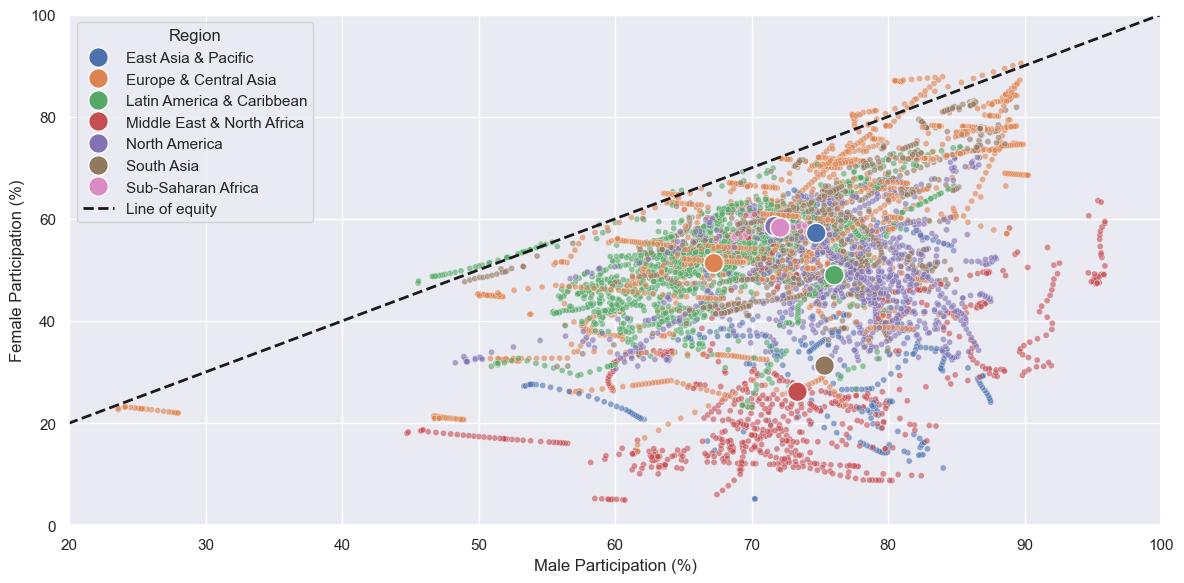

In [91]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_filtered, x='VALUE_MALE', y='VALUE_FEMALE',
                hue='REGION', s=20, alpha=0.6, legend=False)

sns.scatterplot(data=centroids, x='VALUE_MALE', y='VALUE_FEMALE',
                hue='REGION', marker='o', s=200, edgecolor='white', linewidth=1,
                legend=True)
plt.plot([0, 100], [0, 100], 'k--', lw=2, label='Line of equity')  # Line of equality

# plt.title('Labor force participation rate % of male population ages 15+')
plt.xlabel('Male Participation (%)')
plt.ylabel('Female Participation (%)')
plt.xlim(20, 100)
plt.ylim(0, 100)
plt.legend(loc='upper left', title='Region')
plt.tight_layout()
plt.show()

In [92]:
Ratio = Ratio[['REF_AREA_ID','REF_AREA_NAME','TIME_PERIOD','OBS_VALUE','SEX_ID']]
Ratio_countries = Ratio[Ratio['REF_AREA_NAME'].isin(countries)].copy()

# Applica la funzione per creare la colonna REGION
Ratio_countries.loc[:, 'REGION'] = Ratio_countries.loc[:,'REF_AREA_NAME'].apply(assign_region)

Ratio_filtered = Ratio_countries.dropna()
Ratio_filtered = Ratio_filtered.groupby(['TIME_PERIOD', 'REGION'])['OBS_VALUE'].mean().reset_index()

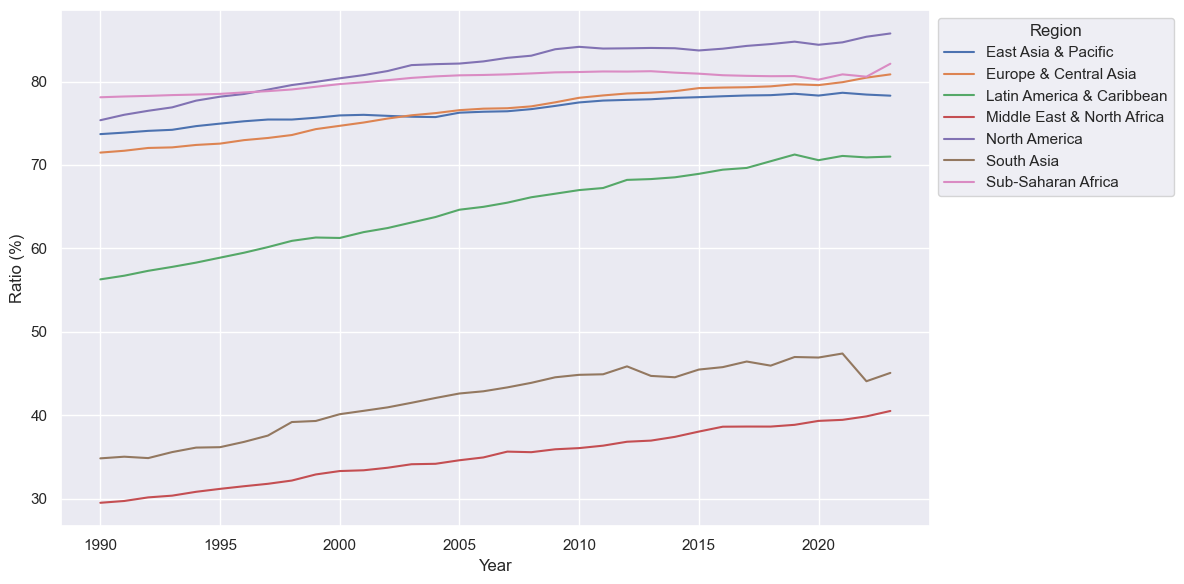

In [93]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=Ratio_filtered, x='TIME_PERIOD', y='OBS_VALUE', hue='REGION')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Region')
plt.xlabel('Year')
plt.ylabel('Ratio (%)')
plt.tight_layout()
plt.show()

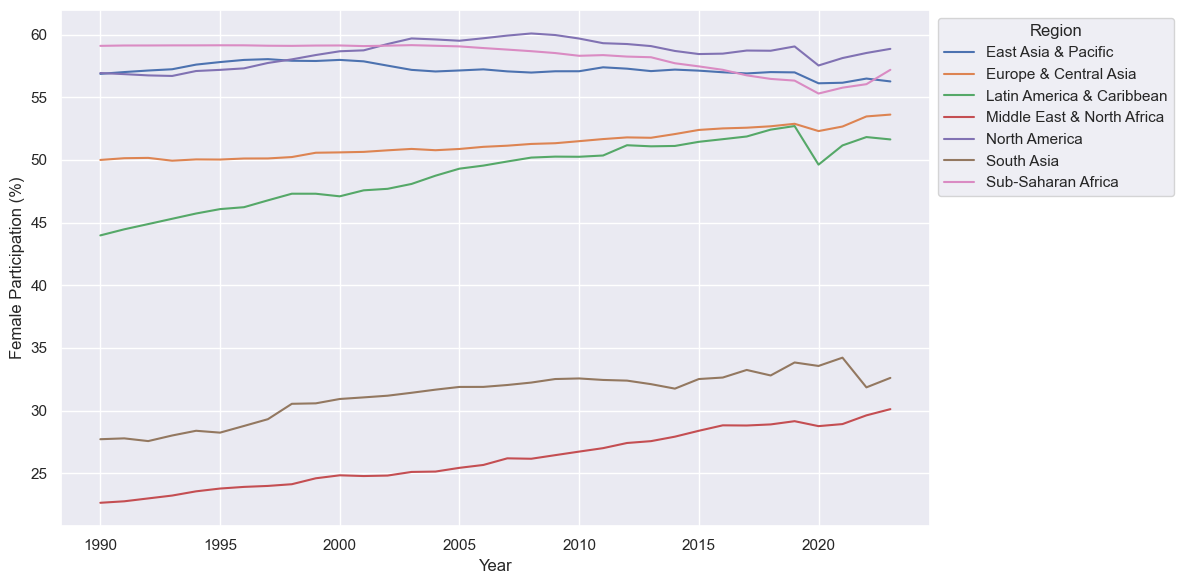

In [94]:
means = df_filtered.groupby(['REGION','TIME_PERIOD'])[['VALUE_FEMALE']].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=means, x='TIME_PERIOD', y='VALUE_FEMALE', hue='REGION')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Region')
plt.xlabel('Year')
plt.ylabel('Female Participation (%)')
plt.tight_layout()
plt.show()